# One Dimensional Wave Equation Detect Standing Waves
### Driven Oscillations Only

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

plt.rcParams['figure.figsize'] = [10, 8]

### Initial Values

In [2]:
mu = 1.0  # kg/m
T = 1.0  # N

dx = 0.01  # 1 cm
dt = 0.001  # .1 s

x_start, x_end = 0, 10.0  # m
t_start, t_end = 0.0, 120.0  # s

y_min, y_max = -0.20, 0.20

ContourLevels = 50
ProgressUpdateSkip = 5000
GraphSkip = 100

# Standing wave search parameters
t_search_standing_start = 60.0  # s
tolerance = 1.0

### Determine the number of bins

In [3]:
Nx = int((x_end-x_start)/dx + 1)
Nt = int((t_end-t_start)/dt + 1)
NRows = int(Nt/GraphSkip) + 1

print(f'This will simulate a wave on a string from {x_start:0.2f} to {x_end:0.2f} meters with a spacing of {dx:0.4f} meters.')
print(f'This will require {Nx} bins (including 0).')
print('')
print(f'This will simulate from {t_start:0.2f} to {t_end:0.2f} seconds with a bin spacing of {dt:0.4f} seconds.')
print(f'This will require {Nt} bins (including 0) and there will be {NRows} rows on the plot.')

This will simulate a wave on a string from 0.00 to 10.00 meters with a spacing of 0.0100 meters.
This will require 1001 bins (including 0).

This will simulate from 0.00 to 120.00 seconds with a bin spacing of 0.0010 seconds.
This will require 120001 bins (including 0) and there will be 1201 rows on the plot.


### Set up solution array

In [4]:
x = np.linspace(x_start, x_end, Nx)
t = np.linspace(t_start, t_end, NRows)
Node = np.linspace(x_start, x_end, Nx)
Node_Sum = np.linspace(x_start, x_end, Nx)
#y_old, y_now, y_new = np.zeros(Nx), np.zeros(Nx), np.zeros(Nx)

#xtgrid = np.zeros((Nx, NRows))

### Constants

In [5]:
r_squared = (T/mu)*((dt/dx)**2)
print(f'The r_squared constant is {r_squared:0.4f}.')

The r_squared constant is 0.0100.


In [6]:
def RunWaveEquation(freq):
    Period = 1.0/freq  # s
    omega = 2*np.pi*freq
    amplitude = 0.15
    print(f'Calculating wave pattern on a string for a frequency of {freq} Hz.\n')

    y_old, y_now, y_new = np.zeros(Nx), np.zeros(Nx), np.zeros(Nx)
    xtgrid = np.zeros((Nx, NRows))

    Count = 0
    GraphCount = 0

    TotalCount = GraphSkip*Nt

    xtgrid[:, 0] = y_now

    for i in range(1, Nt):
        Count += 1
        CurrentTime = Count*dt
        y_now[0] = amplitude*np.sin(omega*CurrentTime)
        y_new[1:Nx-1] = 2*(1-r_squared)*y_now[1:Nx-1] - y_old[1:Nx-1] + r_squared*(y_now[2:Nx] + y_now[0:Nx-2])           
        y_old = y_now.copy()
        y_now = y_new.copy()

        # if((Count % ProgressUpdateSkip == 0) and (Count > 0)):
        #     print(f'Calculating time step {Count} of {Nt} (Current time of {Count*dt:0.3f} of {t_end} s)...')

        if(Count % GraphSkip == 0):
            GraphCount += 1
            xtgrid[:, GraphCount] = y_new

    # print('The calculations are completed.')
    return xtgrid

In [7]:
def IsStandingWave(xtgrid):

    # Get the starting row to search for a potential standing wave pattern
    i_search_standing_start = int((t_search_standing_start/dt) / GraphSkip)
    #print(f'i_search_standing_start = {i_search_standing_start}')
    
    # Sum all of the values in rows (times) from the minimum time to the end
    CombinedRow = np.sum(ResultGrid[:, i_search_standing_start:], axis=1)
    #print(CombinedRow)

    # Declare a variable that will change to the value of True if a standing wave is detected
    IsStanding = False
    
    # What goes here to finish this?  
    # Make sure you test this against known standing wave patterns and known non-standing wave patterns.
    for i in range(0, Nx):
        if CombinedRow[i] > 0 and CombinedRow[i-1] == 0:
            #print(f'CombinedRow{i} = {CombinedRow[i]}')
            
            Node_Sum[i] = 1
            #print(f'Node_Sum = {Node_Sum}')
            
        elif CombinedRow[i] > 0 and CombinedRow[i-1] < 0:
            Node_Sum[i] = 1
            
        elif CombinedRow[i] < 0 and CombinedRow[i-1] > 0:
            Node_Sum[i] = 1
            
        elif CombinedRow[i] == 0 and CombinedRow[i-1] > 0:
            Node_Sum[i] = 1
            
        elif CombinedRow[i] < 0 and CombinedRow[i-1] == 0:
            Node_Sum[i] = 1
            
        else:
            Node_Sum[i] = 0
            
    Node_Counter = np.sum(Node_Sum)
            
    if Node_Counter == FreqCurrent * 20 + 1:
        IsStanding = True
        print(f'Found a standing wave pattern at {FreqCurrent} Hz with {Node_Counter} nodes and {Node_Counter - 1} antinodes!')
            
    return IsStanding

For my IsStanding i was having trouble with the CombinedRow**2 and getting Node_Counter to work because for each FreqCurrent it would change how close the values got to zero so i changed it so that it was just the CombinedRow not squared so it had the negatives and positives and then i used the negatives and positives as a point that i could straddle and use for Node_Counter. I set the Node_Sum to add one if it was tripped when going from 0 to positive, 0 to negative, negative to positive, and positive to negative which lets me know if the string crosses the x axis and how many times. The reason this only works for standing waves is because when non standing waves are added up the values will sometimes cross zero and sometimes trip the Node_Counter but if the Node_Counter is not equal to FreqCurrent * 20 + 1 (which is how many nodes should be there by definition) then IsStanding will not be set equal to True and the while statement will continue trying to find the standing waves. The feature i added to this code was to show how many nodes and antinodes are on the standing wave.

Calculating wave pattern on a string for a frequency of 0.1 Hz.

Found a standing wave pattern at 0.1 Hz with 3.0 nodes and 2.0 antinodes!


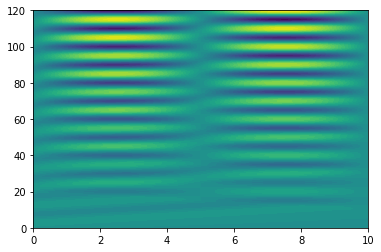

In [9]:
FreqStart = 0.1
dFreq = 0.01

Count = 0
MaxCount = 100

FreqCurrent = FreqStart

Node_Sum = np.linspace(x_start, x_end, Nx)

IsStanding = False

while(IsStanding == False and Count < MaxCount):
    Count += 1
    ResultGrid = RunWaveEquation(FreqCurrent)
    IsStanding = IsStandingWave(ResultGrid)
        
    if IsStanding == False:
        FreqCurrent += dFreq
        FreqCurrent = float(round(FreqCurrent, 3))

plt.contourf(x, t, ResultGrid.T, ContourLevels, antialiased=False);

### 3D View

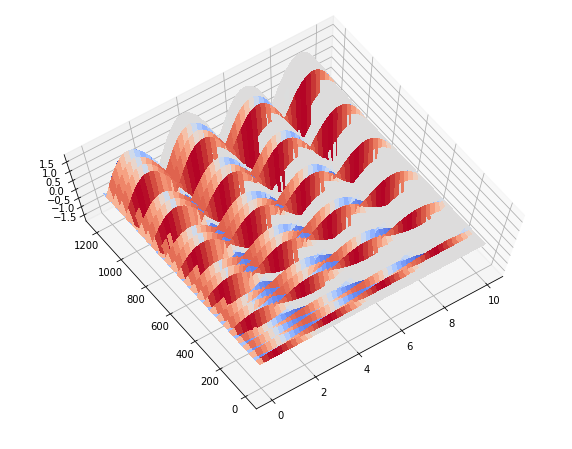

In [18]:
X, T = np.meshgrid(x, range(0, NRows))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,T, ResultGrid.T, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(75, 235)
plt.show()